In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from ase.io.gaussian import read_gaussian_out
%matplotlib inline
#sns.set()
#sns.set_context("talk")

In [3]:
opts = ["loose", "med", "tight", "verytight"]

CCCCCCC_421.log is probably not complete yet...
CCCCCCC_345.log is probably not complete yet...
CCCCCCC_344.log is probably not complete yet...
CCCCCCC_802.log is probably not complete yet...
CCCCCCC_871.log is probably not complete yet...
CCCCCCC_878.log is probably not complete yet...
CCCCCCC_349.log is probably not complete yet...
CCCCCCC_995.log is probably not complete yet...
CCCCCCC_348.log is probably not complete yet...
CCCCCCC_809.log is probably not complete yet...
CC(C)OC=CO_39.log is probably not complete yet...
CC(C)OC=CO_37.log is probably not complete yet...
CCCCCCC_347.log is probably not complete yet...
CCCCCCC_343.log is probably not complete yet...
CC(C)OC=CO_126.log is probably not complete yet...
COC=CO_9.log is probably not complete yet...
CCCCCCC_426.log is probably not complete yet...
CCCCCCC_422.log is probably not complete yet...
CCCCCCC_428.log is probably not complete yet...
CC(C)OC=CO_40.log is probably not complete yet...


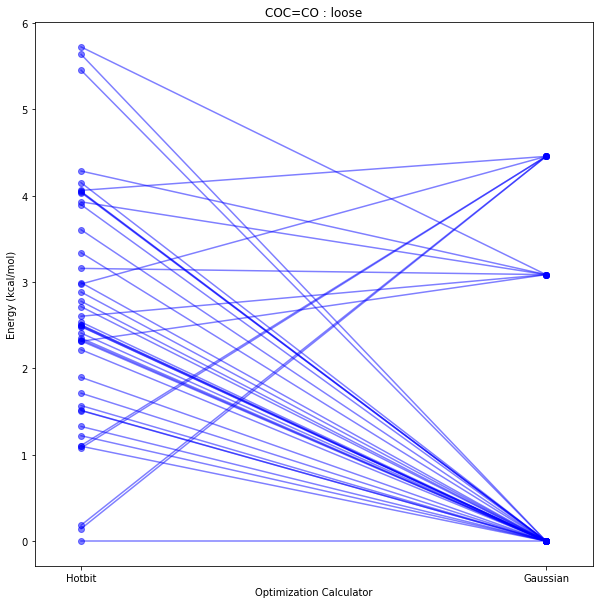

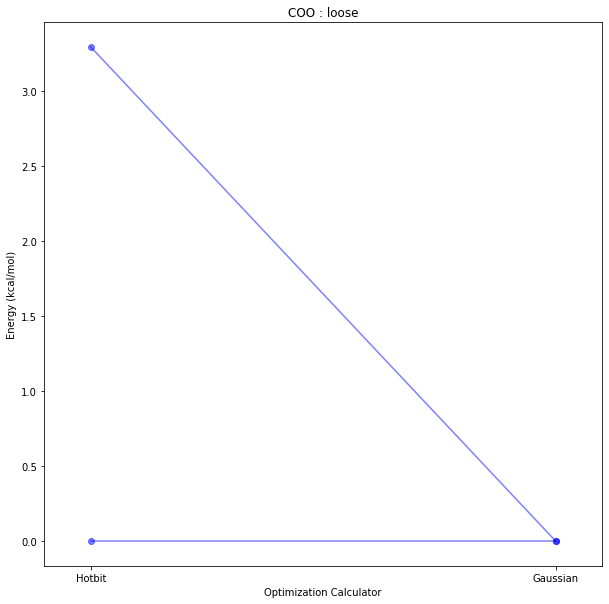

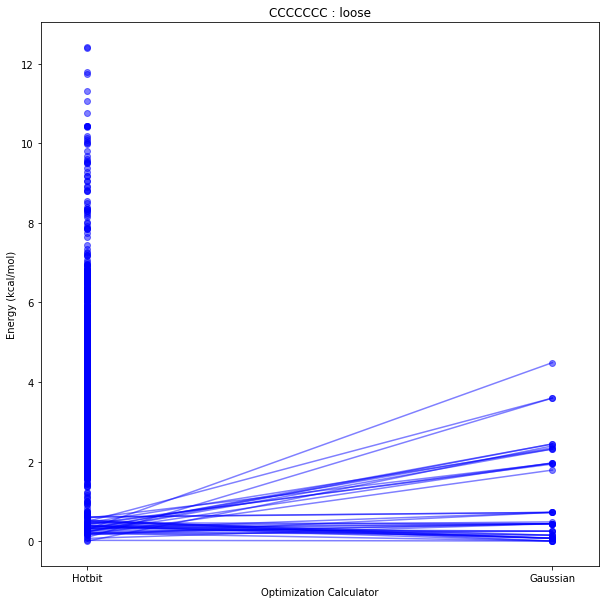

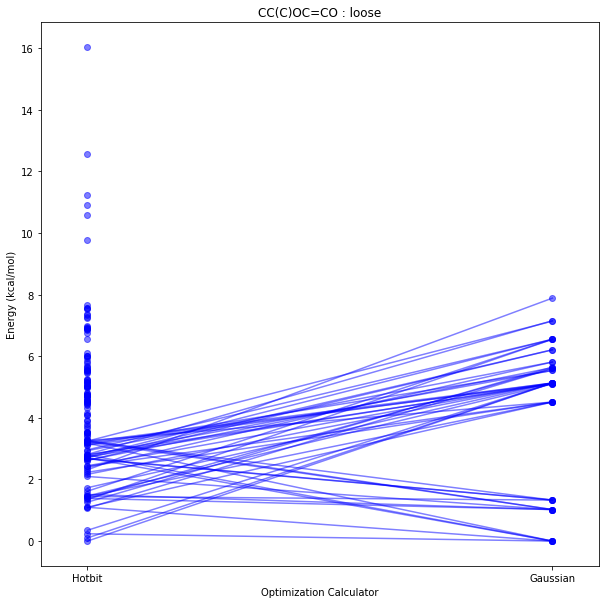

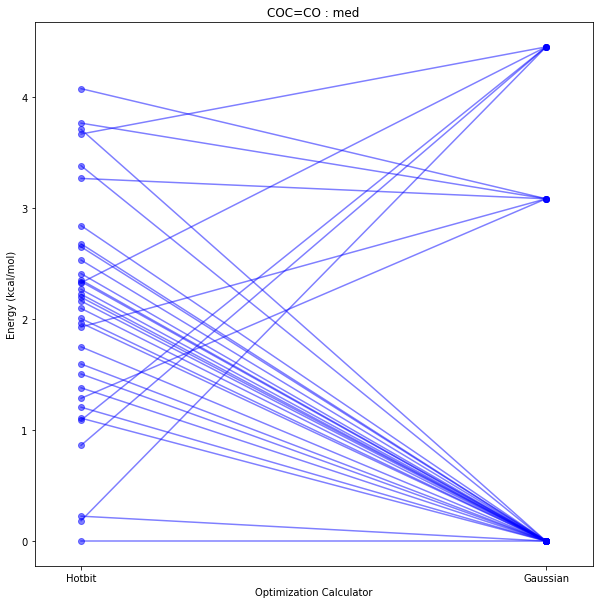

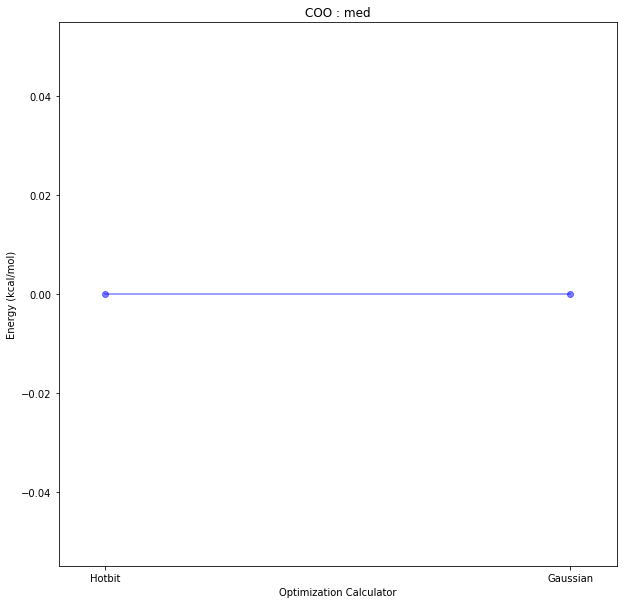

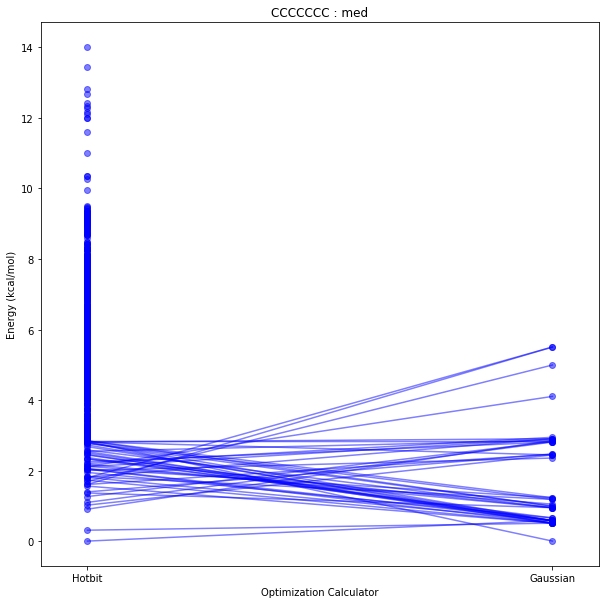

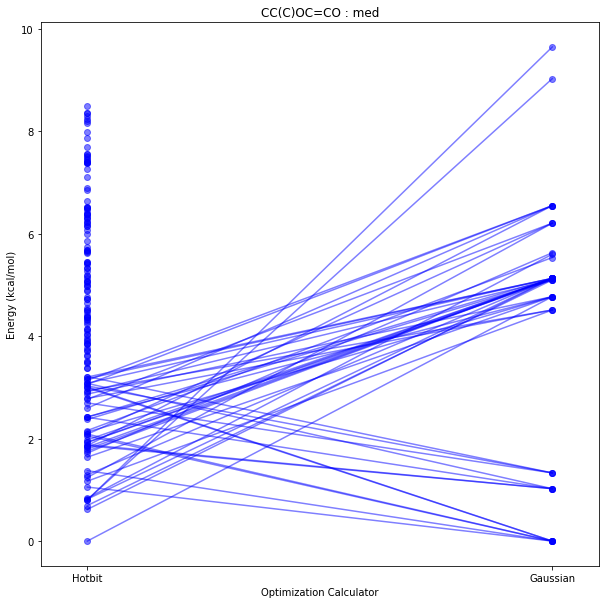

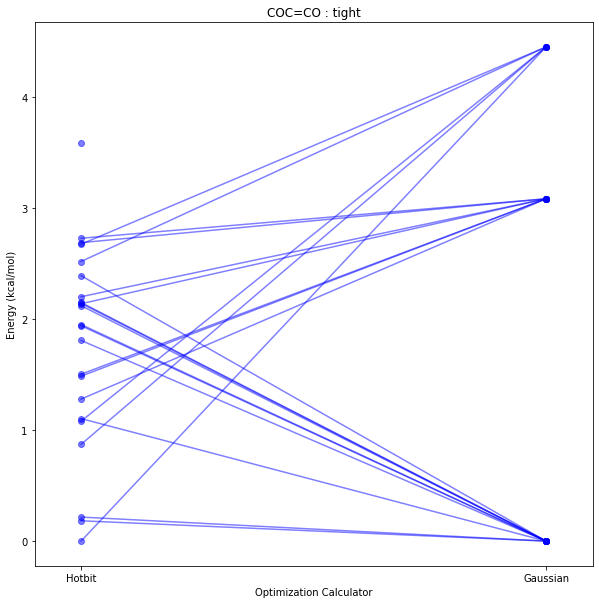

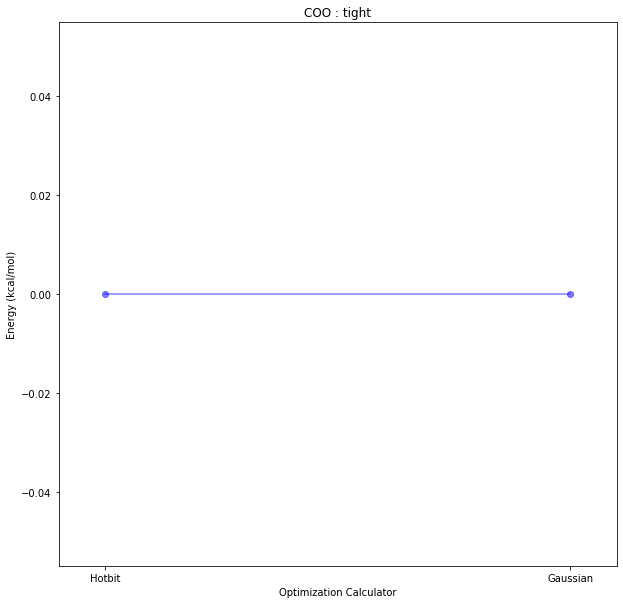

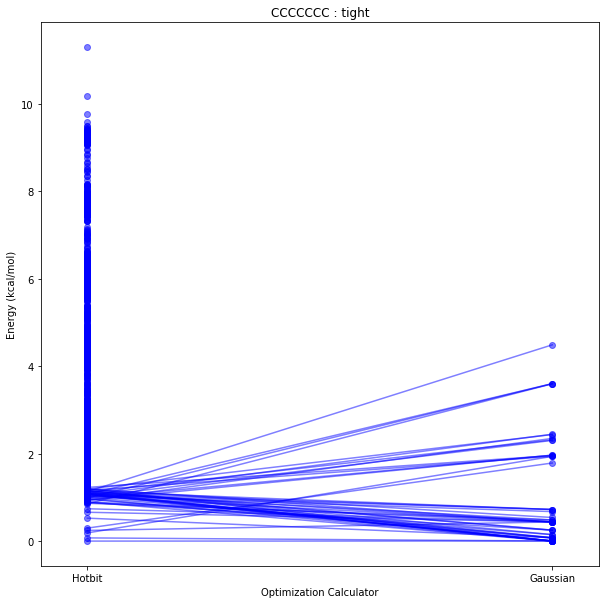

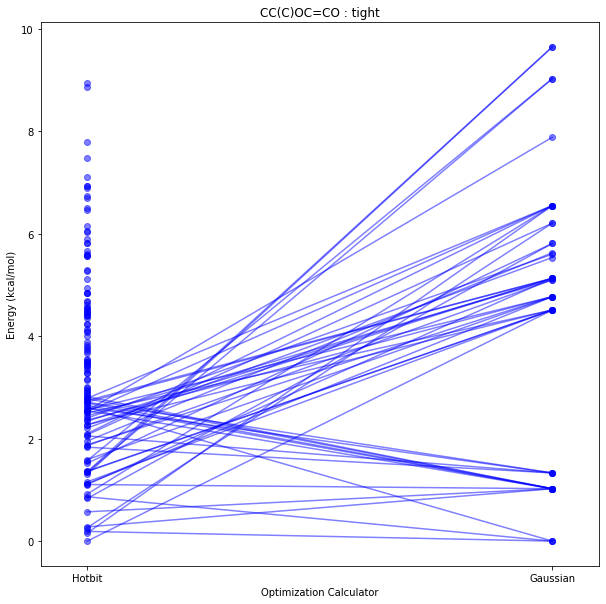

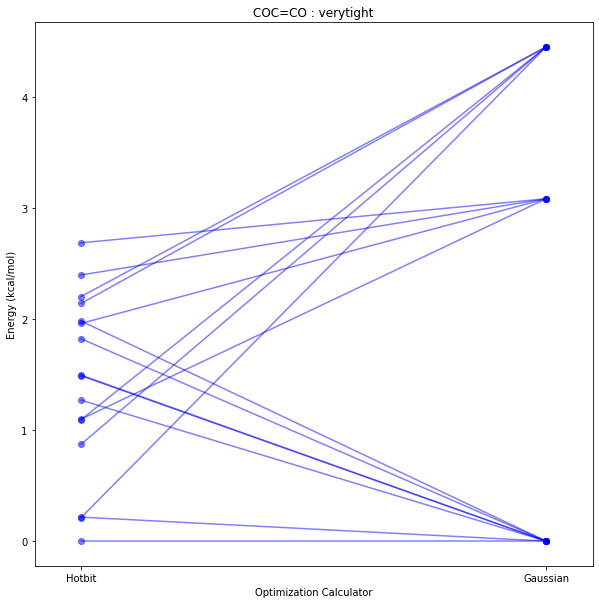

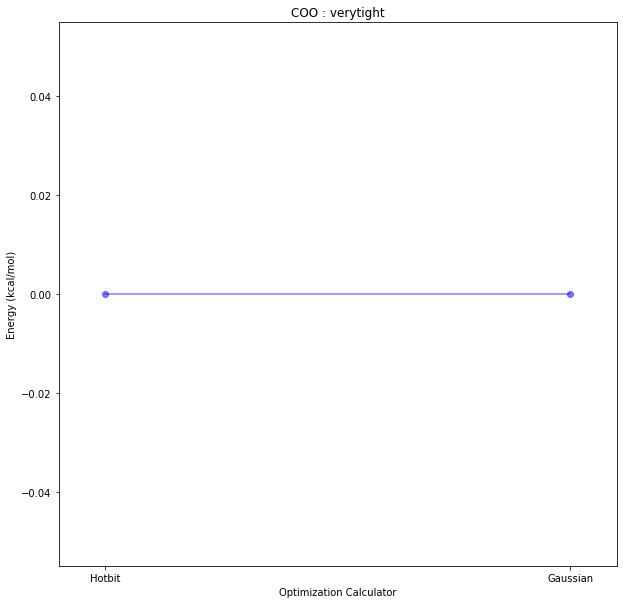

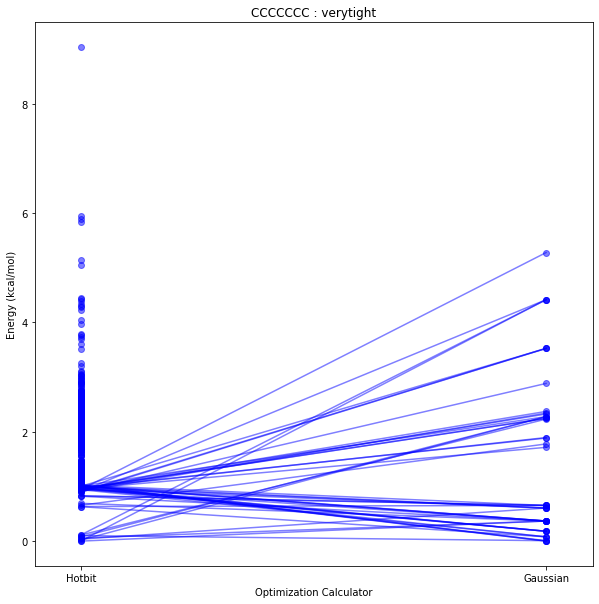

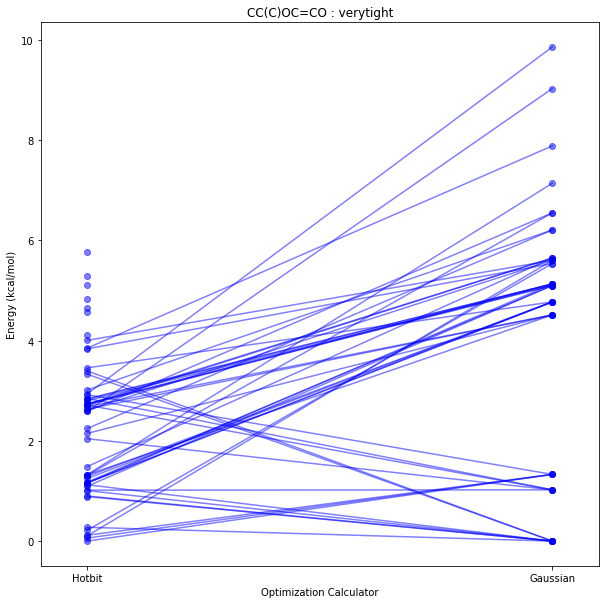

In [28]:

for opt_type in opts:
    dirpath = os.path.join(opt_type, "species")
    for smiles in os.listdir(dirpath):

        if "." in smiles:
            continue
        
        results = pd.read_csv(os.path.join(dirpath, smiles, "hotbit.csv"))
        results = results[["index", "hotbit"]]
    
        qm_directory = os.path.join(dirpath, smiles, "conformers")

        files = [f for f in os.listdir(qm_directory) if f.endswith(".log")]
        gaussian_results = {}
        for fi in files:
            try:
                _, index = fi.strip(".log").split("_")
                index = int(index)
                atoms = read_gaussian_out(os.path.join(qm_directory, fi))
                energy = atoms.get_potential_energy()
                gaussian_results[index] = energy
                forces = atoms.get_forces()
            except IndexError:
                print("{} is probably not complete yet...".format(fi))
                
        
        results = results.join(pd.DataFrame(gaussian_results.values(), columns=["gaussian"])) / 0.043
        results["index"] = results["index"] * 0.043
        results.dropna()
        results.to_csv(os.path.join(dirpath, smiles, "results.csv"))
        ax = (results - results.min())[["hotbit", "gaussian"]].T.plot(legend=False, c="b", marker="o", alpha=0.5, figsize=(10,10))
        #ax.plot([1,1], c="r")
        ax.set_xticks([0.0,1.0])
        ax.set_xticklabels(["Hotbit", "Gaussian"])
        ax.set_xlim([-0.1, 1.1])
        ax.set_ylabel("Energy (kcal/mol)")
        ax.set_xlabel("Optimization Calculator")
        ax.set_title("{} : {}".format(smiles, opt_type))
        ax.figure.savefig(os.path.join(dirpath, smiles, "results.pdf"), bbox_inches="tight")
        
        




In [19]:

for opt_type in opts:
    results = pd.read_csv("{}/hotbit-ts.csv".format(opt_type))
    results = results[["index", "hotbit"]]
    smiles = "CCC+[O]O_[CH2]CC+OO"
    directory = "{1}/ts/{0}/conformers".format(smiles, opt_type)
    files = [f for f in os.listdir(directory) if f.endswith(".log")]
    gaussian_results = {
        "shell":{},
        "overall":{}
    }
    for fi in files:
        if "shell" in fi:
            _, _, _, t, index = fi.strip(".log").split("_")
        else:
            _, _, _, index = fi.strip(".log").split("_") 
            t = "overall"
        index = int(index)
        try:
            atoms = read_gaussian_out(os.path.join(directory, fi))
            energy = atoms.get_potential_energy()
            gaussian_results[t][index] = energy
            forces = atoms.get_forces()
        except:
            print "Error with {}".format(fi)
        
    results = results.join(pd.DataFrame(gaussian_results)) / 0.043
    ax = (results - results.min())[["hotbit", "shell", "overall"]].T.plot(legend=False, c="b", marker="o", alpha=0.5, figsize=(10,10))
    #ax.plot([1,1], c="r")
    ax.set_xticks([0.0,1.0])
    ax.set_xticklabels(["Hotbit", "Shell", "Overall"])
    ax.set_ylabel("Energy (kcal/mol)")
    ax.set_xlabel("Optimization Calculator")
    ax.set_title("{} : {}".format(smiles, opt_type))
    #ax.set_ylim([-1,10])




SyntaxError: invalid syntax (<ipython-input-19-c39c795395a8>, line 24)